In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import Ridge,Lasso

In [2]:
df_cars = pd.read_csv('dataset/Car details v3.csv')
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df_cars.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
df_cars.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### Categorical Features:

In [6]:
print('Categorical Data: ')
print('Fuel unique values: ', df_cars['fuel'].unique())
print('Number of unique values: ', df_cars['fuel'].unique().size)
print('Seller type unique values: ', df_cars['seller_type'].unique())
print('Number of unique values: ', df_cars['seller_type'].unique().size)
print('Transmission unique values: ', df_cars['transmission'].unique())
print('Number of unique values: ', df_cars['transmission'].unique().size)
print('Owner unique values: ', df_cars['owner'].unique())
print('Number of unique values: ', df_cars['owner'].unique().size)

Categorical Data: 
Fuel unique values:  ['Diesel' 'Petrol' 'LPG' 'CNG']
Number of unique values:  4
Seller type unique values:  ['Individual' 'Dealer' 'Trustmark Dealer']
Number of unique values:  3
Transmission unique values:  ['Manual' 'Automatic']
Number of unique values:  2
Owner unique values:  ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
Number of unique values:  5


#### Explore Categorical Features

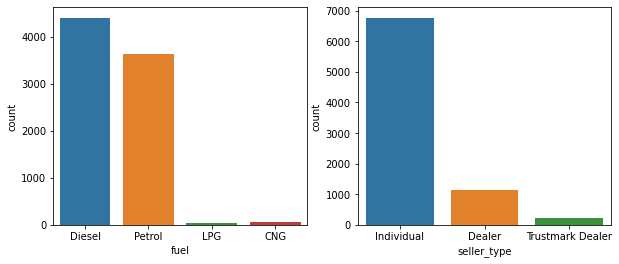

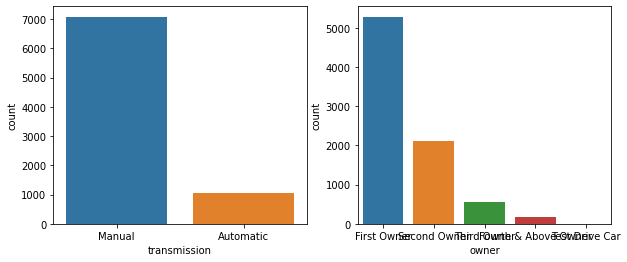

In [7]:
# Figure to intercept categorical Features
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10, 4])

    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df_cars)
    i += 1

    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i], data=df_cars)
    i += 1

    plt.show()

#### Data Pre-Processing

In [3]:
df_cars.drop(df_cars.index[df_cars.mileage.isna()], inplace=True)
df_cars.drop(df_cars.index[df_cars.engine.isna()], inplace=True)
df_cars.drop(df_cars.index[df_cars.max_power.isna()], inplace=True)
df_cars.drop(df_cars.index[df_cars.torque.isna()], inplace=True)
df_cars.drop(df_cars.index[df_cars.seats.isna()], inplace=True)

In [4]:
df_cars.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [9]:
df_cars['fuel'].replace(['Petrol', 'Diesel', 'LPG', 'CNG', 'Electric'], [1, 2, 3, 4, 5], inplace=True)
df_cars['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer'], [1, 2, 3], inplace=True)
df_cars['transmission'].replace(['Manual', 'Automatic'], [0, 1], inplace=True)
df_cars['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],
                      [1, 2, 3, 4, 0], inplace=True)
df_cars['year'] = 2020 - df_cars['year']
print('**********************************************************************************')
print('Data Types after Replacement:\n ', df_cars.dtypes)
df_cars.head()


**********************************************************************************
Data Types after Replacement:
  name              object
year               int64
selling_price    float64
km_driven        float64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,6,13.017003,381.444622,2,1,0,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,6,12.821258,346.410162,2,1,0,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,14,11.970350,374.165739,1,1,0,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,10,12.323856,356.370594,2,1,0,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,13,11.775290,346.410162,1,1,0,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
df_cars.describe()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,6.016064,6.498137e+05,6.918866e+04,1.572350,1.199722,0.131672,1.444093,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.541406,0.468575,0.338155,0.706148,0.959208
min,0.000000,2.999900e+04,1.000000e+00,1.000000,1.000000,0.000000,0.000000,2.000000
25%,3.000000,2.700000e+05,3.500000e+04,1.000000,1.000000,0.000000,1.000000,5.000000
50%,5.000000,4.500000e+05,6.000000e+04,2.000000,1.000000,0.000000,1.000000,5.000000
75%,8.000000,6.900000e+05,9.542500e+04,2.000000,1.000000,0.000000,2.000000,5.000000
max,26.000000,1.000000e+07,2.360457e+06,4.000000,3.000000,1.000000,4.000000,14.000000


#### Cleaning the dataset

Skewness: 11.342853


/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


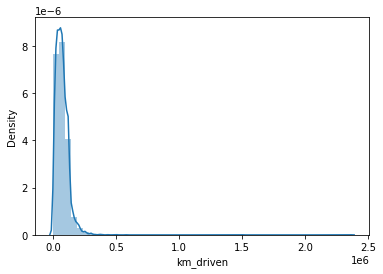

In [12]:
# Checking Skew
print("Skewness: %f" %df_cars['km_driven'].skew())
selling_price = sns.distplot(df_cars['km_driven'])

#### Skewness for km_driven

Skewness: 11.342853
Lpg Transformation:  -1.2686756742262397
Sqrt Transformation:  0.6932005467312637
Cbrt Transformation:  -0.03576651284781622


/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

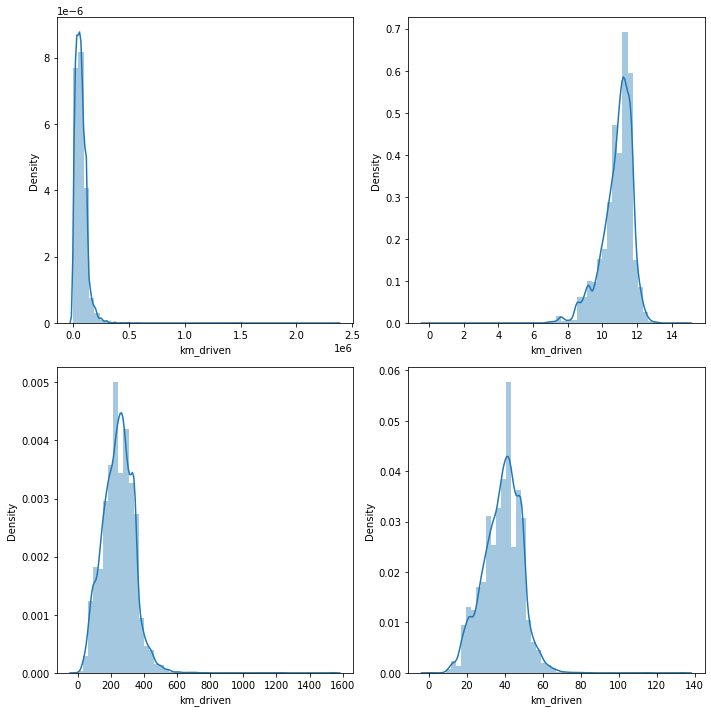

In [5]:
print("Skewness: %f" %df_cars['km_driven'].skew())

log_km_driven = np.log(df_cars['km_driven'])
print('Lpg Transformation: ',log_km_driven.skew())

sqrt_km_driven = np.sqrt(df_cars['km_driven'])
print('Sqrt Transformation: ',sqrt_km_driven.skew())

cbrt_km_driven = np.cbrt(df_cars['km_driven'])
print('Cbrt Transformation: ',cbrt_km_driven.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_cars['km_driven'],ax = ax[0,0])
sns.distplot(log_km_driven, ax = ax[0,1])
sns.distplot(sqrt_km_driven, ax = ax[1,0])
sns.distplot(cbrt_km_driven, ax = ax[1,1])
plt.tight_layout()

#### Skewness correction for selling price

Skewness: 4.156864
Log Transformation:  0.25198380219772876
Sqrt Transformation:  2.2421689298410814
Cbrt Transformation:  1.5573409832804253


/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

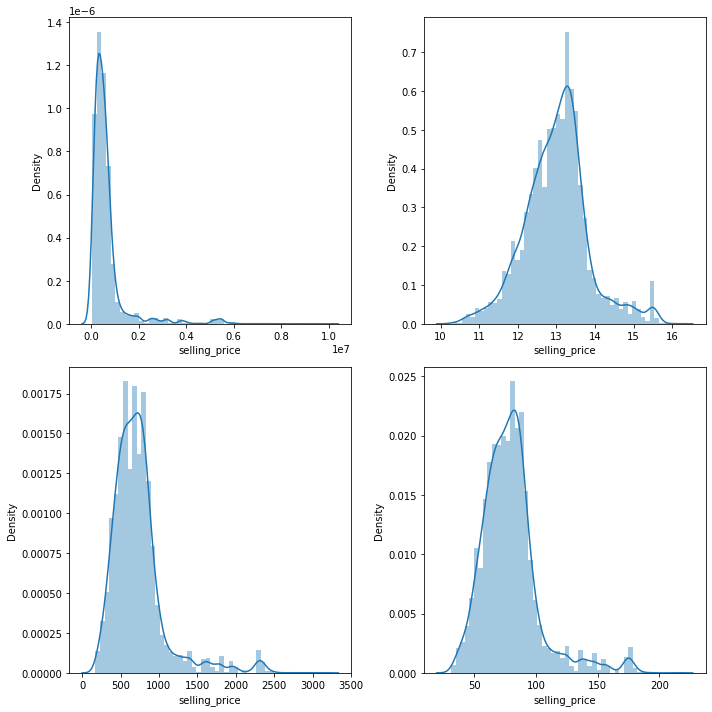

In [6]:
print("Skewness: %f" %df_cars['selling_price'].skew())

log_sell_price = np.log(df_cars['selling_price'])
print('Log Transformation: ',log_sell_price.skew())

sqrt_sell_price = np.sqrt(df_cars['selling_price'])
print('Sqrt Transformation: ',sqrt_sell_price.skew())

cbrt_sell_price = np.cbrt(df_cars['selling_price'])
print('Cbrt Transformation: ',cbrt_sell_price.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_cars['selling_price'],ax = ax[0,0])
sns.distplot(log_sell_price, ax = ax[0,1])
sns.distplot(sqrt_sell_price, ax = ax[1,0])
sns.distplot(cbrt_sell_price, ax = ax[1,1])
plt.tight_layout()

/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/silicon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

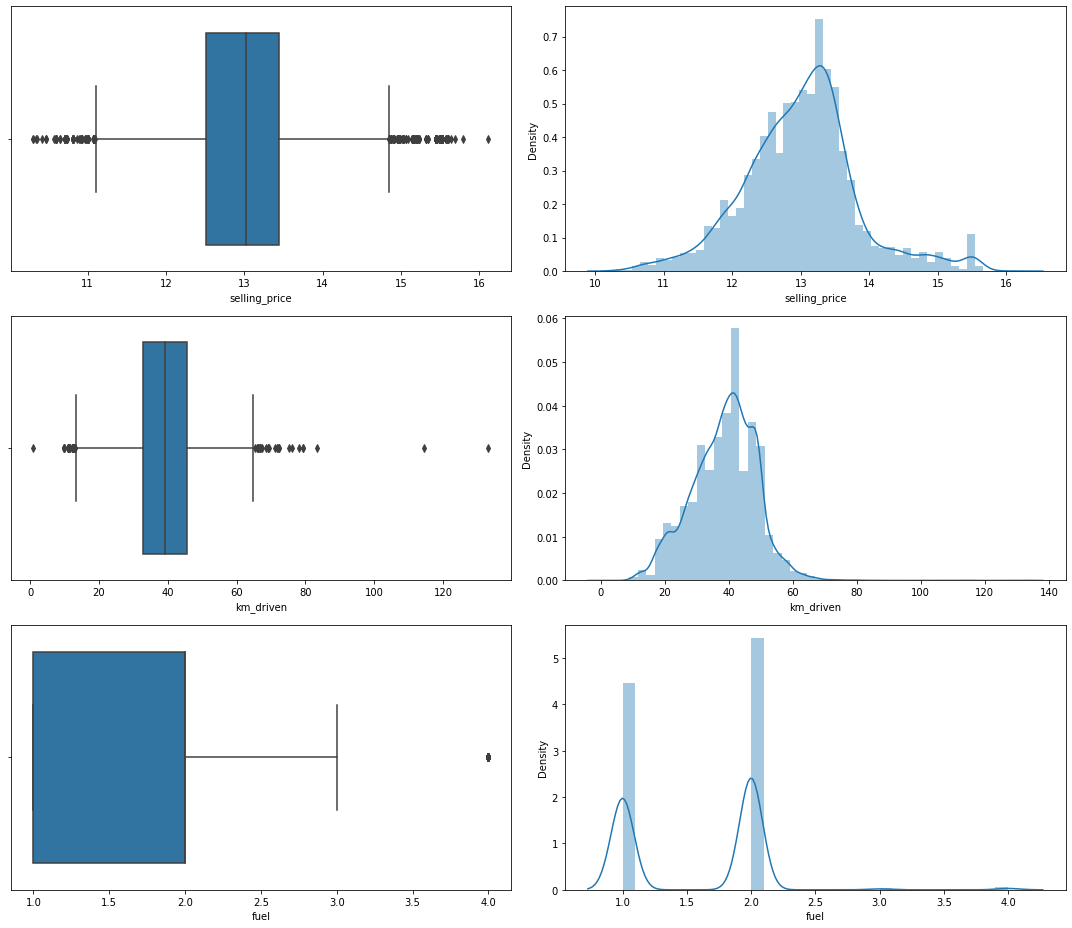

In [19]:
fig, ax = plt.subplots(3, 2, figsize = (15, 13))
sns.boxplot(x= log_sell_price, ax = ax[0,0])
sns.distplot(log_sell_price, ax = ax[0,1])
sns.boxplot(x= cbrt_km_driven, ax = ax[1,0])
sns.distplot(cbrt_km_driven, ax = ax[1,1])
sns.boxplot(x= df_cars["fuel"], ax = ax[2,0])
sns.distplot(df_cars['fuel'], ax = ax[2,1])
plt.tight_layout()

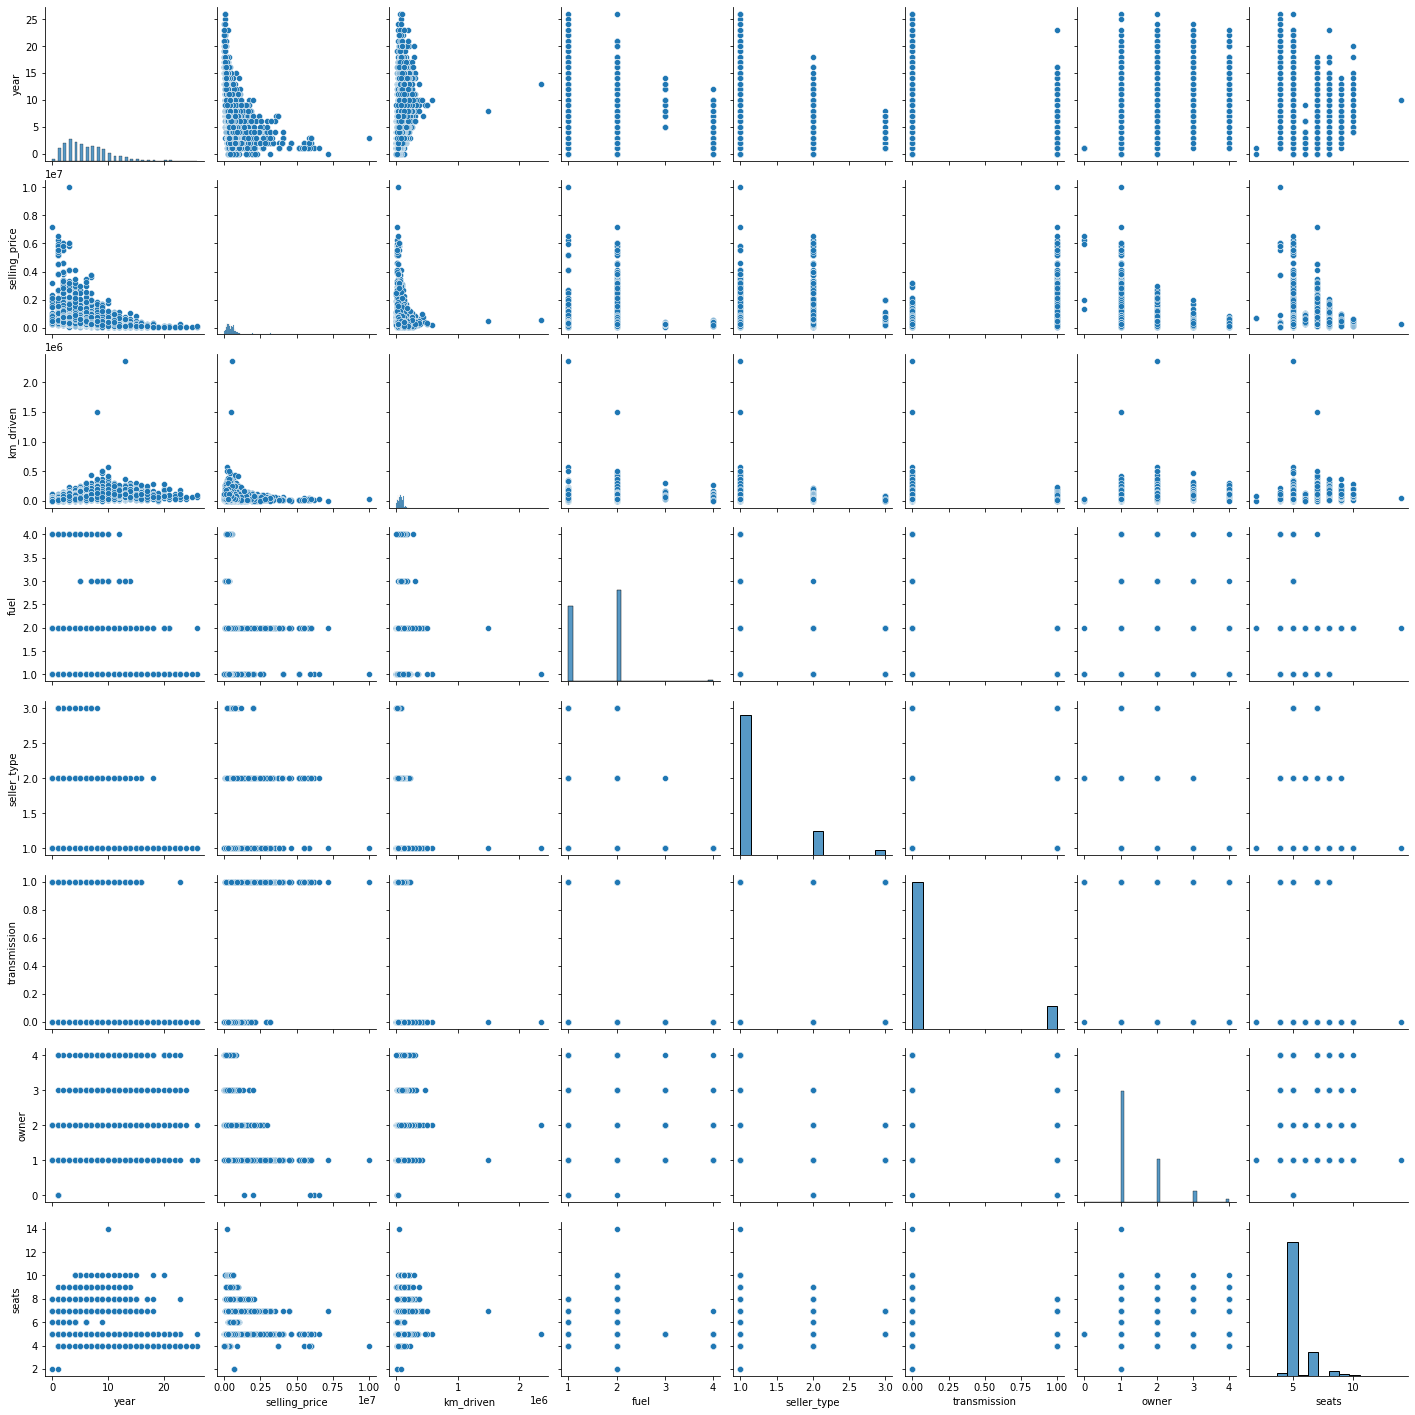

In [20]:
sns.pairplot(df_cars)

In [7]:
df_cars['selling_price'] = log_sell_price
df_cars['km_driven'] = sqrt_km_driven
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,13.017003,381.444622,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,12.821258,346.410162,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,11.970350,374.165739,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,12.323856,356.370594,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,11.775290,346.410162,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


#### Check correlation

Correlation
selling_price    1.000000
transmission     0.503132
seller_type      0.326013
fuel             0.261214
seats            0.188363
km_driven       -0.339524
owner           -0.393783
year            -0.702641
Name: selling_price, dtype: float64


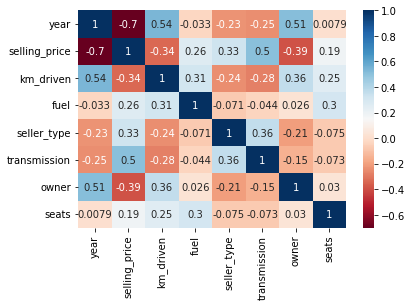

In [10]:
# Check correlation
print('Correlation')
print(df_cars.corr()['selling_price'].sort_values(ascending=False))
sns.heatmap(df_cars.corr(), annot=True, cmap="RdBu")
plt.show()

In [11]:
# x and y Determination
x = df_cars.loc[:, ['year',  'fuel', 'seller_type', 'transmission', 'owner']]
y = df_cars.loc[:, 'selling_price']

In [12]:
# train & test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Training a model

In [25]:
print('Linear Regression')
linReg = LinearRegression()
linReg.fit(x_train, y_train)
y_predict = linReg.predict(x_test)

# Mean square Error 
print('MSE: ', int(np.sqrt(mean_squared_error(y_test, y_predict))))

# R_score
r_score = r2_score(y_test, y_predict) * 100
print("linear Regression model accuracy(in %):",int(r_score), '%')

# intercept
print('Model intercept: ', linReg.intercept_)

# coefficient
print('Model coefficient: ', linReg.coef_)

# Ordainary least squar 'OLS'
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())

Linear Regression
MSE:  0
linear Regression model accuracy(in %): 66 %
Model intercept:  12.87146320651953
Model coefficient:  [-0.12200207  0.41202462  0.15250066  0.82859644 -0.05444859]
                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          3.075e+04
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        07:04:34   Log-Likelihood:                         -14985.
No. Observations:                6324   AIC:                                  2.998e+04
Df Residuals:                    6319   BIC:                                  3.001e+04
Df Model:                           5                                                  
Covariance Type:   

#### Lasso Regression 

In [13]:
print('Lasso Regression')
lassoReg = Lasso(alpha=3)
lassoModel = lassoReg.fit(x_train, y_train)
y_lassoPredict = lassoReg.predict(x_test)

print('MSE', np.sqrt(mean_squared_error(y_test, y_lassoPredict)))

# R_score
r_scoreLasso = r2_score(y_test, y_lassoPredict) * 100
print("linear Regression model accuracy(in %):",int(r_scoreLasso), '%')

# intercept
print('Model intercept: ', lassoReg.intercept_)

# coefficient
print('Model coefficient: ', lassoReg.coef_)

# OlS
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())

Lasso Regression
MSE 0.8138950340337066
linear Regression model accuracy(in %): 0 %
Model intercept:  12.995025252770647
Model coefficient:  [-0.  0.  0.  0. -0.]
                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          3.075e+04
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        07:19:11   Log-Likelihood:                         -14985.
No. Observations:                6324   AIC:                                  2.998e+04
Df Residuals:                    6319   BIC:                                  3.001e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust        

#### Ridge Regression

In [14]:
print('Ridge Regression')
RidgeReg = Ridge(alpha=5)
RidgeModel = RidgeReg.fit(x_train, y_train)
y_RidgePredict = RidgeReg.predict(x_test)
print('MSE', np.sqrt(mean_squared_error(y_test, y_RidgePredict)))
r_scoreRidge = r2_score(y_test, y_RidgePredict) * 100
print("linear Regression model accuracy(in %):",
      int(r_scoreRidge), '%')
print('Model intercept: ', RidgeReg.intercept_)
print('Model coefficient: ', RidgeReg.coef_)
model = sm.OLS(y_train, x_train).fit()
y_predict = model.predict(x_test)
print(model.summary())

Ridge Regression
MSE 0.47088847253172084
linear Regression model accuracy(in %): 66 %
Model intercept:  12.87400978044084
Model coefficient:  [-0.1221273   0.4107493   0.15328573  0.82203237 -0.05436137]
                                 OLS Regression Results                                
Dep. Variable:          selling_price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          3.075e+04
Date:                Thu, 21 Jul 2022   Prob (F-statistic):                        0.00
Time:                        07:19:26   Log-Likelihood:                         -14985.
No. Observations:                6324   AIC:                                  2.998e+04
Df Residuals:                    6319   BIC:                                  3.001e+04
Df Model:                           5                                                  
Cova